In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('seaborn-dark')

In [7]:
ls ../data

2013_-_Global_500_Emissions_and_Response_Status.csv
ghgp_data_by_year_8_5_17.xlsx*


In [26]:
emissions = pd.read_csv('../data/2013_-_Global_500_Emissions_and_Response_Status.csv')

In [27]:
emissions.head()

,Company Name,Account Number,Country,Reporting Year,Ticker Symbol,ISIN,Disclosure Score,Performance Band,Parent Account,Permission,Response Status,Scope 1 (metric tonnes CO2e),Scope 2 (metric tonnes CO2e),Country Location
0,3M Company,285,USA,2013,MMM US,US88579Y1010,70.0,D,NaN,Public,AQ*,4540000.0,2230000.0,"(37.09024, -95.712891)"
1,ABB,282,Switzerland,2013,ABBN VX,CH0012221716,82.0,B,NaN,Public,AQ*,819000.0,857000.0,"(46.818188, 8.227512)"
2,Abbott Laboratories,64,USA,2013,ABT US,US0028241000,84.0,B,NaN,Public,AQ*,470781.0,537821.0,"(37.09024, -95.712891)"
3,Accenture,21318,Ireland,2013,ACN US,IE00B4BNMY34,92.0,B,NaN,Public,AQ*,9383.0,224615.0,"(53.41291, -8.24389)"
4,Ace Ltd.,21320,Switzerland,2013,ACE US,CH0044328745,93.0,A,NaN,Public,AQ*,12912.0,39791.0,"(46.818188, 8.227512)"


In [28]:
emissions['Scope 1'] = emissions['Scope 1 (metric tonnes CO2e)']
emissions['Scope 2'] = emissions['Scope 2 (metric tonnes CO2e)']
emissions['Company Name'] = emissions['Company Name ']
emissions['Country'] = emissions['Country ']

In [29]:
emissions = emissions[['Company Name', 'Country', 'Disclosure Score', 'Performance Band', 'Scope 1', 'Scope 2']]

In [30]:
emissions.head()

,Company Name,Country,Disclosure Score,Performance Band,Scope 1,Scope 2
0,3M Company,USA,70.0,D,4540000.0,2230000.0
1,ABB,Switzerland,82.0,B,819000.0,857000.0
2,Abbott Laboratories,USA,84.0,B,470781.0,537821.0
3,Accenture,Ireland,92.0,B,9383.0,224615.0
4,Ace Ltd.,Switzerland,93.0,A,12912.0,39791.0


Let's look at the distribution of these disclosure scores:

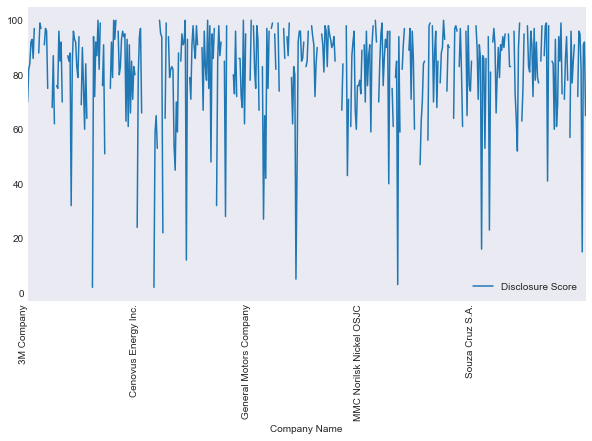

In [43]:
f, ax = plt.subplots()

emissions.plot('Company Name', 'Disclosure Score', ax=ax)
f.autofmt_xdate(rotation=90)

In [52]:
emissions.describe()

,Disclosure Score,Scope 1,Scope 2
count,391.000000,3.390000e+02,3.390000e+02
mean,81.427110,8.603685e+06,1.504191e+06
std,18.053032,2.598386e+07,2.718645e+06
min,2.000000,4.147000e+01,1.220000e+02
25%,74.000000,3.832100e+04,1.669390e+05
50%,86.000000,3.362580e+05,4.431650e+05
75%,94.000000,2.763000e+06,1.514495e+06
max,100.000000,1.816900e+08,2.000000e+07


In [47]:
emissions[emissions['Country'] == 'USA'][]

,Company Name,Country,Disclosure Score,Performance Band,Scope 1,Scope 2
0,3M Company,USA,70.0,D,4.540000e+06,2230000.00
2,Abbott Laboratories,USA,84.0,B,4.707810e+05,537821.00
6,"Adobe Systems, Inc.",USA,97.0,A,2.744000e+03,22995.00
8,AFLAC Incorporated,USA,85.0,B,3.884000e+03,18536.00
11,"Air Products & Chemicals, Inc.",USA,99.0,B,1.476721e+07,10563030.00
14,Alexion Pharmaceuticals,USA,NaN,NaN,NaN,NaN
15,"Allergan, Inc.",USA,91.0,B,4.912800e+04,52049.00
17,Allstate Corporation,USA,96.0,B,4.079600e+04,150401.00
18,"Altria Group, Inc.",USA,75.0,C,2.839260e+05,236169.00
19,Amazon.com Inc.,USA,NaN,NaN,NaN,NaN
